In [1]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, to_tree
import matplotlib.pyplot as plt
from katlas.core import *
import seaborn as sns
from Bio import Phylo
from io import StringIO

In [3]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# Hierarchical Clustering

In [79]:
norm = Data.get_kinase_norm().set_index('kinase')

In [80]:
norm

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,-5F,-5Y,-5W,-5H,-5K,-5R,-5Q,-5N,-5D,-5E,-5s,-5t,-5y,-4P,-4G,-4A,-4C,-4S,-4T,-4V,-4I,-4L,-4M,-4F,-4Y,-4W,-4H,-4K,-4R,-4Q,-4N,-4D,-4E,-4s,-4t,-4y,-3P,-3G,-3A,-3C,-3S,-3T,-3V,-3I,-3L,-3M,-3F,-3Y,-3W,-3H,-3K,-3R,-3Q,-3N,-3D,-3E,-3s,-3t,-3y,-2P,-2G,-2A,-2C,-2S,-2T,-2V,-2I,-2L,-2M,-2F,-2Y,-2W,-2H,-2K,-2R,-2Q,-2N,-2D,-2E,-2s,-2t,-2y,-1P,-1G,-1A,-1C,-1S,-1T,-1V,-1I,-1L,-1M,-1F,-1Y,-1W,-1H,-1K,-1R,-1Q,-1N,-1D,-1E,-1s,-1t,-1y,1P,1G,1A,1C,1S,1T,1V,1I,1L,1M,1F,1Y,1W,1H,1K,1R,1Q,1N,1D,1E,1s,1t,1y,2P,2G,2A,2C,2S,2T,2V,2I,2L,2M,2F,2Y,2W,2H,2K,2R,2Q,2N,2D,2E,2s,2t,2y,3P,3G,3A,3C,3S,3T,3V,3I,3L,3M,3F,3Y,3W,3H,3K,3R,3Q,3N,3D,3E,3s,3t,3y,4P,4G,4A,4C,4S,4T,4V,4I,4L,4M,4F,4Y,4W,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAK1,0.0720,0.0245,0.0284,0.0456,0.0425,0.0425,0.0951,0.1554,0.0993,0.0864,0.0425,0.0952,0.0315,0.0331,0.0262,0.0956,0.0560,0.0275,0.0160,0.0153,0.0201,0.0201,0.0611,0.0534,0.0642,0.0706,0.0560,0.0619,0.0619,0.0619,0.0621,0.0742,0.0693,0.0520,0.0534,0.0403,0.0514,0.0809,0.0715,0.0627,0.0429,0.0332,0.0560,0.0332,0.0332,0.0339,0.1084,0.0512,0.1119,0.0655,0.0527,0.0527,0.0641,0.0599,0.0527,0.0782,0.0487,0.0411,0.0425,0.0397,0.0517,0.0581,0.0695,0.0582,0.0272,0.0370,0.0303,0.0303,0.0274,0.0226,0.0283,0.0538,0.0588,0.0555,0.0555,0.0340,0.0378,0.0569,0.1166,0.0336,0.0399,0.0289,0.0567,0.0587,0.0555,0.1517,0.0808,0.0805,0.0636,0.0209,0.0209,0.0486,0.1136,0.0706,0.0385,0.0313,0.0545,0.0545,0.0392,0.0435,0.0654,0.0554,0.0545,0.0777,0.0440,0.0688,0.1229,0.0923,0.0397,0.0434,0.0161,0.0146,0.0121,0.0121,0.0178,0.0463,0.7216,0.0312,0.0223,0.0143,0.0143,0.0107,0.0102,0.0131,0.0124,0.0129,0.0143,0.0162,0.0160,0.0194,0.0249,0.0138,0.0170,0.0103,0.0098,0.0123,0.0123,0.0100,0.0527,0.0749,0.0750,0.0684,0.0552,0.0552,0.0542,0.0370,0.0414,0.0481,0.0486,0.0459,0.0572,0.0620,0.0577,0.0774,0.0771,0.0834,0.0552,0.0524,0.0409,0.0409,0.0410,0.0681,0.0923,0.0582,0.0742,0.0582,0.0582,0.0610,0.0388,0.0489,0.0437,0.0430,0.0533,0.0481,0.0674,0.0739,0.0901,0.0623,0.0735,0.0405,0.0371,0.0335,0.0335,0.0359,0.0628,0.0702,0.0646,0.0603,0.0560,0.0560,0.0422,0.0415,0.0461,0.0464,0.0523,0.0521,0.0826,0.0560,0.0831,0.0928,0.0635,0.0592,0.0389,0.0457,0.0251,0.0251,0.0270
ACVR2A,0.0415,0.0481,0.0584,0.0489,0.0578,0.0578,0.0598,0.0625,0.0596,0.0521,0.0600,0.0578,0.0803,0.0570,0.0510,0.0475,0.0430,0.0536,0.0888,0.0789,0.0783,0.0783,0.0760,0.0466,0.0549,0.0555,0.0551,0.0549,0.0549,0.0543,0.0526,0.0520,0.0576,0.0619,0.0586,0.0754,0.0551,0.0406,0.0457,0.0482,0.0501,0.1040,0.0869,0.0809,0.0809,0.0681,0.0502,0.0653,0.0537,0.0588,0.0516,0.0516,0.0546,0.0503,0.0479,0.0515,0.0516,0.0550,0.0591,0.0529,0.0355,0.0461,0.0508,0.0502,0.1050,0.1205,0.1205,0.1205,0.0975,0.0189,0.0294,0.0312,0.0726,0.0295,0.0295,0.0295,0.0267,0.0253,0.0234,0.0297,0.0293,0.0317,0.0287,0.0208,0.0297,0.0452,0.0398,0.2530,0.3077,0.0595,0.0595,0.0424,0.0398,0.0335,0.0484,0.1042,0.0630,0.0630,0.0650,0.0473,0.0750,0.0847,0.0688,0.0783,0.0816,0.0630,0.0313,0.0340,0.0529,0.0480,0.0724,0.0761,0.0807,0.0807,0.1065,0.0200,0.0338,0.0381,0.0748,0.0548,0.0548,0.0779,0.0691,0.0514,0.0586,0.0548,0.0571,0.0566,0.0412,0.0192,0.0245,0.0723,0.0375,0.0990,0.1888,0.2735,0.2735,0.1651,0.0582,0.0799,0.0660,0.0600,0.0582,0.0582,0.0588,0.0538,0.0397,0.0517,0.0578,0.0651,0.0578,0.0660,0.0473,0.0550,0.0591,0.0507,0.0728,0.0604,0.0650,0.0650,0.0516,0.0670,0.0592,0.0529,0.0481,0.0590,0.0590,0.0567,0.0554,0.0612,0.0589,0.0644,0.0654,0.0635,0.0590,0.0462,0.0387,0.0499,0.0524,0.0622,0.0870,0.0519,0.0519,0.0815,0.0758,0.0544,0.0498,0.0517,0.0563,0.0563,0.0516,0.0563,0.0512,0.0662,0.0523,0.0579,0.0800,0.0573,0.0527,0.0491,0.0616,0.0556,0.0640,0.0640,0.0703,0.0703,0.0589
ACVR2B,0.0533,0.0517,0.0566,0.0772,0.0533,0.0533,0.0543,0.0442,0.0471,0.0516,0.0604,0.0607,0.0721,0.0518,0.0432,0.0472,0.0498,0.0595,0.1065

In [81]:
linkage_matrix = linkage(norm, method='ward')

In [82]:
linkage_matrix

array([[4.20000000e+01, 4.30000000e+01, 9.29940321e-02, 2.00000000e+00],
       [4.80000000e+01, 5.50000000e+01, 1.05056556e-01, 2.00000000e+00],
       [9.00000000e+00, 1.00000000e+01, 1.07432118e-01, 2.00000000e+00],
       ...,
       [5.96000000e+02, 5.98000000e+02, 1.03877957e+01, 7.00000000e+00],
       [4.87000000e+02, 6.01000000e+02, 1.05695897e+01, 2.96000000e+02],
       [6.02000000e+02, 6.03000000e+02, 2.14257303e+01, 3.03000000e+02]])

In [83]:
linkage_matrix.shape

(302, 4)

In [84]:
tree = to_tree(linkage_matrix)

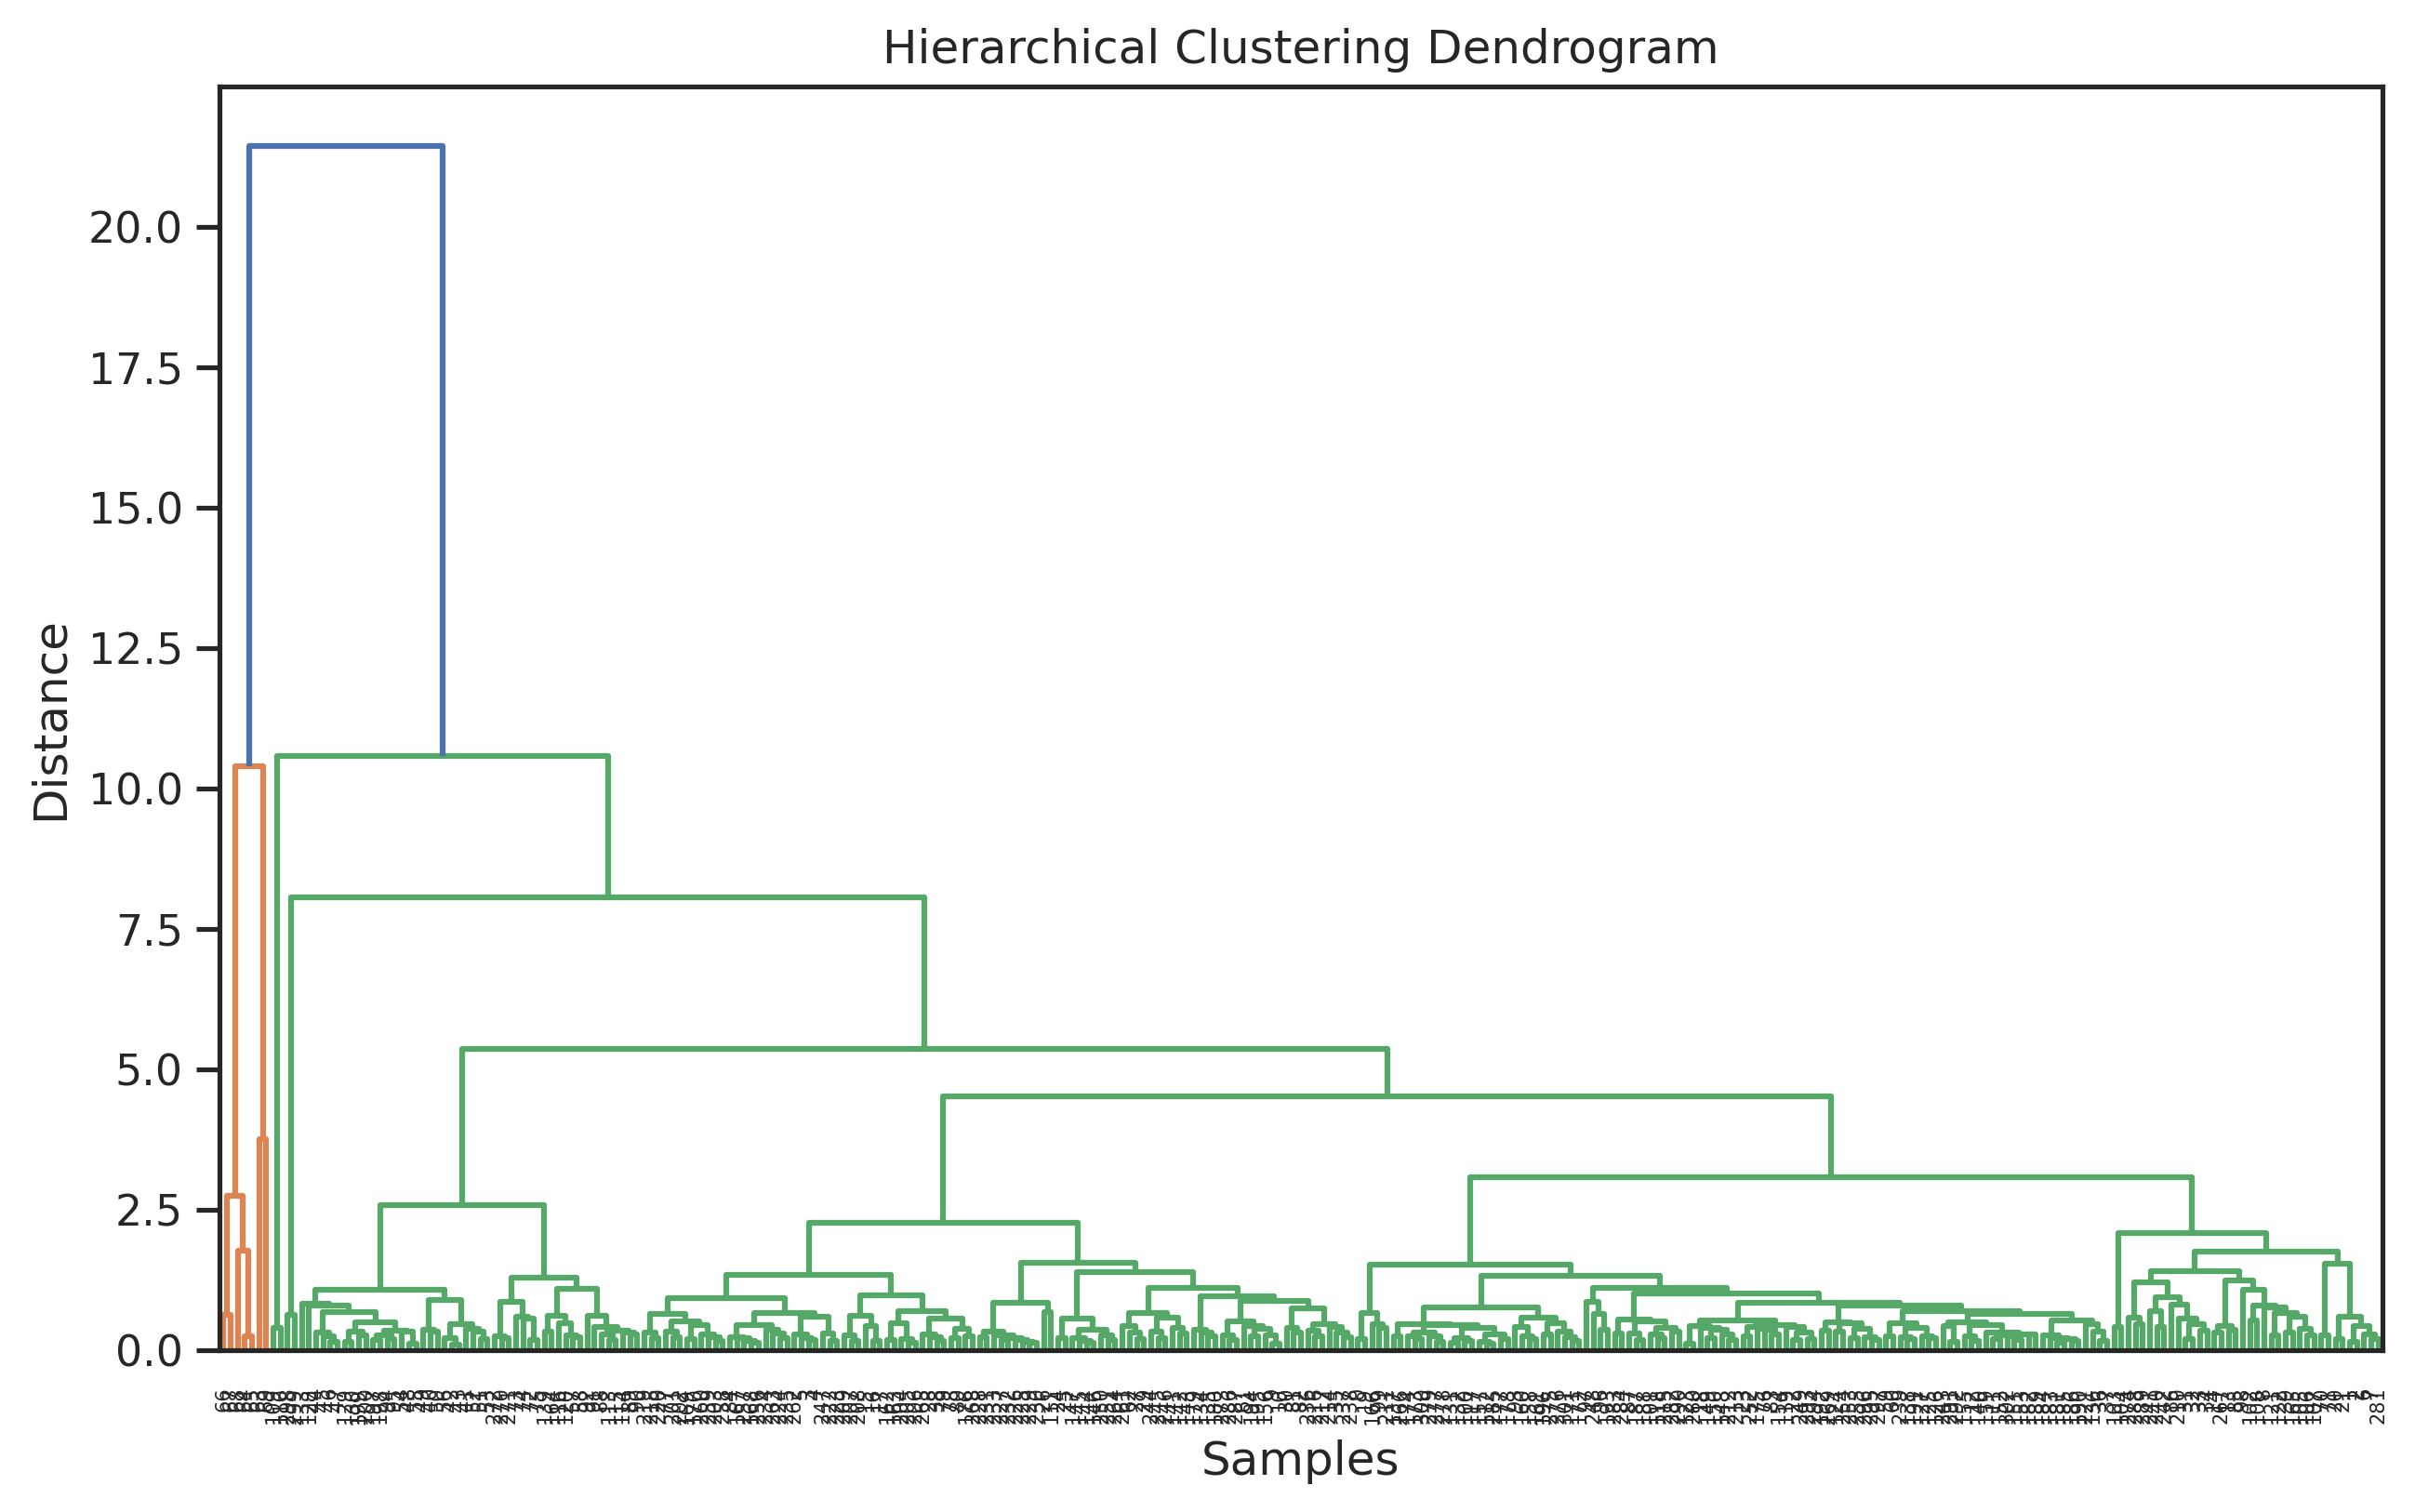

In [85]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## Convert to newick format and visualize in Figtree

In [86]:
# Define a function to convert the tree to Newick format
def to_newick(node):
    if node.is_leaf():
        return norm.index[node.id]
    else:
        return '(' + to_newick(node.left) + ', ' + to_newick(node.right) + ')'

# Convert the tree to Newick format
newick_str = to_newick(tree)

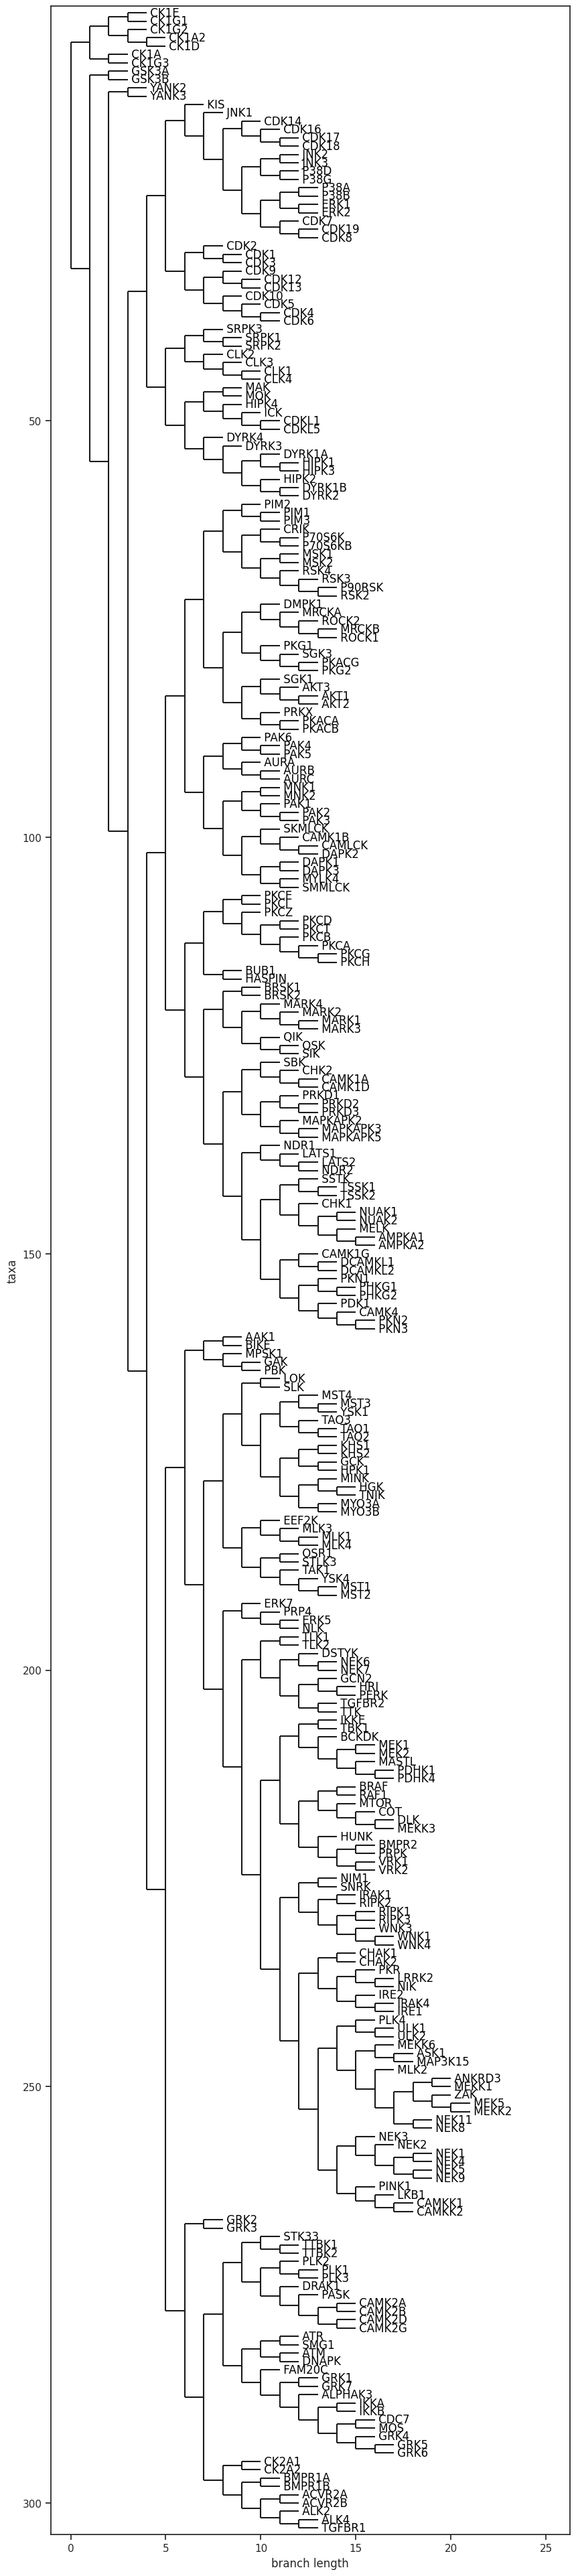

In [87]:
# Plot the tree using Bio.Phylo
tree = Phylo.read(StringIO(newick_str), "newick")

# Create a new figure and a subplot
fig, ax = plt.subplots(figsize=(10, 50), dpi=100)

# Draw the tree
Phylo.draw(tree, axes=ax)

In [88]:
# Save the Newick string to a file
with open('tree.newick', 'w') as f:
    f.write(newick_str)

Open the tree.newick in figtree

## Cut trees

We can cut the hierarchical clustering dendrogram at a certain distance to form flat clusters.

In [89]:
from scipy.cluster.hierarchy import fcluster

In [92]:
# Assuming `Z` is your linkage matrix, and you want to cut the dendrogram
# at a distance of `t` to form flat clusters. The exact value of `t`
# depends on the distances in your dataset and how many clusters you want.
labels_t05 = fcluster(linkage_matrix, t=0.5, criterion='distance')
labels_t1 = fcluster(linkage_matrix, t=1.0, criterion='distance') # more clusters
labels_t2 = fcluster(linkage_matrix, t=2.0, criterion='distance') # less clusters

In [93]:
info = pd.DataFrame(index=norm.index).reset_index()

In [94]:
# Add cluster labels to the original DataFrame
info['Cluster_t05'] = labels_t05
info['Cluster_t1'] = labels_t1
info['Cluster_t2'] = labels_t2

## Visualize

In [95]:
df = Data.get_kinase_norm()

In [96]:
df

,kinase,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,-5F,-5Y,-5W,-5H,-5K,-5R,-5Q,-5N,-5D,-5E,-5s,-5t,-5y,-4P,-4G,-4A,-4C,-4S,-4T,-4V,-4I,-4L,-4M,-4F,-4Y,-4W,-4H,-4K,-4R,-4Q,-4N,-4D,-4E,-4s,-4t,-4y,-3P,-3G,-3A,-3C,-3S,-3T,-3V,-3I,-3L,-3M,-3F,-3Y,-3W,-3H,-3K,-3R,-3Q,-3N,-3D,-3E,-3s,-3t,-3y,-2P,-2G,-2A,-2C,-2S,-2T,-2V,-2I,-2L,-2M,-2F,-2Y,-2W,-2H,-2K,-2R,-2Q,-2N,-2D,-2E,-2s,-2t,-2y,-1P,-1G,-1A,-1C,-1S,-1T,-1V,-1I,-1L,-1M,-1F,-1Y,-1W,-1H,-1K,-1R,-1Q,-1N,-1D,-1E,-1s,-1t,-1y,1P,1G,1A,1C,1S,1T,1V,1I,1L,1M,1F,1Y,1W,1H,1K,1R,1Q,1N,1D,1E,1s,1t,1y,2P,2G,2A,2C,2S,2T,2V,2I,2L,2M,2F,2Y,2W,2H,2K,2R,2Q,2N,2D,2E,2s,2t,2y,3P,3G,3A,3C,3S,3T,3V,3I,3L,3M,3F,3Y,3W,3H,3K,3R,3Q,3N,3D,3E,3s,3t,3y,4P,4G,4A,4C,4S,4T,4V,4I,4L,4M,4F,4Y,4W,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
0,AAK1,0.0720,0.0245,0.0284,0.0456,0.0425,0.0425,0.0951,0.1554,0.0993,0.0864,0.0425,0.0952,0.0315,0.0331,0.0262,0.0956,0.0560,0.0275,0.0160,0.0153,0.0201,0.0201,0.0611,0.0534,0.0642,0.0706,0.0560,0.0619,0.0619,0.0619,0.0621,0.0742,0.0693,0.0520,0.0534,0.0403,0.0514,0.0809,0.0715,0.0627,0.0429,0.0332,0.0560,0.0332,0.0332,0.0339,0.1084,0.0512,0.1119,0.0655,0.0527,0.0527,0.0641,0.0599,0.0527,0.0782,0.0487,0.0411,0.0425,0.0397,0.0517,0.0581,0.0695,0.0582,0.0272,0.0370,0.0303,0.0303,0.0274,0.0226,0.0283,0.0538,0.0588,0.0555,0.0555,0.0340,0.0378,0.0569,0.1166,0.0336,0.0399,0.0289,0.0567,0.0587,0.0555,0.1517,0.0808,0.0805,0.0636,0.0209,0.0209,0.0486,0.1136,0.0706,0.0385,0.0313,0.0545,0.0545,0.0392,0.0435,0.0654,0.0554,0.0545,0.0777,0.0440,0.0688,0.1229,0.0923,0.0397,0.0434,0.0161,0.0146,0.0121,0.0121,0.0178,0.0463,0.7216,0.0312,0.0223,0.0143,0.0143,0.0107,0.0102,0.0131,0.0124,0.0129,0.0143,0.0162,0.0160,0.0194,0.0249,0.0138,0.0170,0.0103,0.0098,0.0123,0.0123,0.0100,0.0527,0.0749,0.0750,0.0684,0.0552,0.0552,0.0542,0.0370,0.0414,0.0481,0.0486,0.0459,0.0572,0.0620,0.0577,0.0774,0.0771,0.0834,0.0552,0.0524,0.0409,0.0409,0.0410,0.0681,0.0923,0.0582,0.0742,0.0582,0.0582,0.0610,0.0388,0.0489,0.0437,0.0430,0.0533,0.0481,0.0674,0.0739,0.0901,0.0623,0.0735,0.0405,0.0371,0.0335,0.0335,0.0359,0.0628,0.0702,0.0646,0.0603,0.0560,0.0560,0.0422,0.0415,0.0461,0.0464,0.0523,0.0521,0.0826,0.0560,0.0831,0.0928,0.0635,0.0592,0.0389,0.0457,0.0251,0.0251,0.0270
1,ACVR2A,0.0415,0.0481,0.0584,0.0489,0.0578,0.0578,0.0598,0.0625,0.0596,0.0521,0.0600,0.0578,0.0803,0.0570,0.0510,0.0475,0.0430,0.0536,0.0888,0.0789,0.0783,0.0783,0.0760,0.0466,0.0549,0.0555,0.0551,0.0549,0.0549,0.0543,0.0526,0.0520,0.0576,0.0619,0.0586,0.0754,0.0551,0.0406,0.0457,0.0482,0.0501,0.1040,0.0869,0.0809,0.0809,0.0681,0.0502,0.0653,0.0537,0.0588,0.0516,0.0516,0.0546,0.0503,0.0479,0.0515,0.0516,0.0550,0.0591,0.0529,0.0355,0.0461,0.0508,0.0502,0.1050,0.1205,0.1205,0.1205,0.0975,0.0189,0.0294,0.0312,0.0726,0.0295,0.0295,0.0295,0.0267,0.0253,0.0234,0.0297,0.0293,0.0317,0.0287,0.0208,0.0297,0.0452,0.0398,0.2530,0.3077,0.0595,0.0595,0.0424,0.0398,0.0335,0.0484,0.1042,0.0630,0.0630,0.0650,0.0473,0.0750,0.0847,0.0688,0.0783,0.0816,0.0630,0.0313,0.0340,0.0529,0.0480,0.0724,0.0761,0.0807,0.0807,0.1065,0.0200,0.0338,0.0381,0.0748,0.0548,0.0548,0.0779,0.0691,0.0514,0.0586,0.0548,0.0571,0.0566,0.0412,0.0192,0.0245,0.0723,0.0375,0.0990,0.1888,0.2735,0.2735,0.1651,0.0582,0.0799,0.0660,0.0600,0.0582,0.0582,0.0588,0.0538,0.0397,0.0517,0.0578,0.0651,0.0578,0.0660,0.0473,0.0550,0.0591,0.0507,0.0728,0.0604,0.0650,0.0650,0.0516,0.0670,0.0592,0.0529,0.0481,0.0590,0.0590,0.0567,0.0554,0.0612,0.0589,0.0644,0.0654,0.0635,0.0590,0.0462,0.0387,0.0499,0.0524,0.0622,0.0870,0.0519,0.0519,0.0815,0.0758,0.0544,0.0498,0.0517,0.0563,0.0563,0.0516,0.0563,0.0512,0.0662,0.0523,0.0579,0.0800,0.0573,0.0527,0.0491,0.0616,0.0556,0.0640,0.0640,0.0703,0.0703,0.0589
2,ACVR2B,0.0533,0.0517,0.0566,0.0772,0.0533,0.0533,0.0543,0.0442,0.0471,0.0516,0.0604,0.0607,0.0721,0.0518,0.0432,0.0472,0.0498,0.0595,0.1065,0.0900,0.0762,0.0762,0.0743,0.0537,0.0627,0.0576,0.0661,0.0571,0.0571,0.0519,0.0459,0.0518,0.0501,0.0625,0.0608,0.0705,0.0610,0.0379,0.0368,0.0493,0.0571,0.1028,0.0875,0.0788,0.0788,0.0852,0.0461,0.05

In [97]:
category = Data.get_kinase_info()[['kinase','Family','category','category_big']]

In [98]:
category

,kinase,Family,category,category_big
0,AAK1,Other,NAK,NAK
1,ALK2,TKL,TGFBR,acidophilic
2,ALK4,TKL,TGFBR,acidophilic
3,ACVR2A,TKL,TGFBR,acidophilic
4,ACVR2B,TKL,TGFBR,acidophilic
...,...,...,...,...
298,VRK1,CK1,ALPHA/MLK,ALPHA/MLK
299,VRK2,CK1,assorted,assorted
300,WNK1,Other,RIPK/WNK,RIPK/WNK
301,WNK3,Other,RIPK/WNK,RIPK/WNK


In [99]:
kinase_info = info.merge(category,'left')

In [100]:
(kinase_info.kinase == df.kinase).value_counts()

True    303
Name: kinase, dtype: int64

### Category from the paper

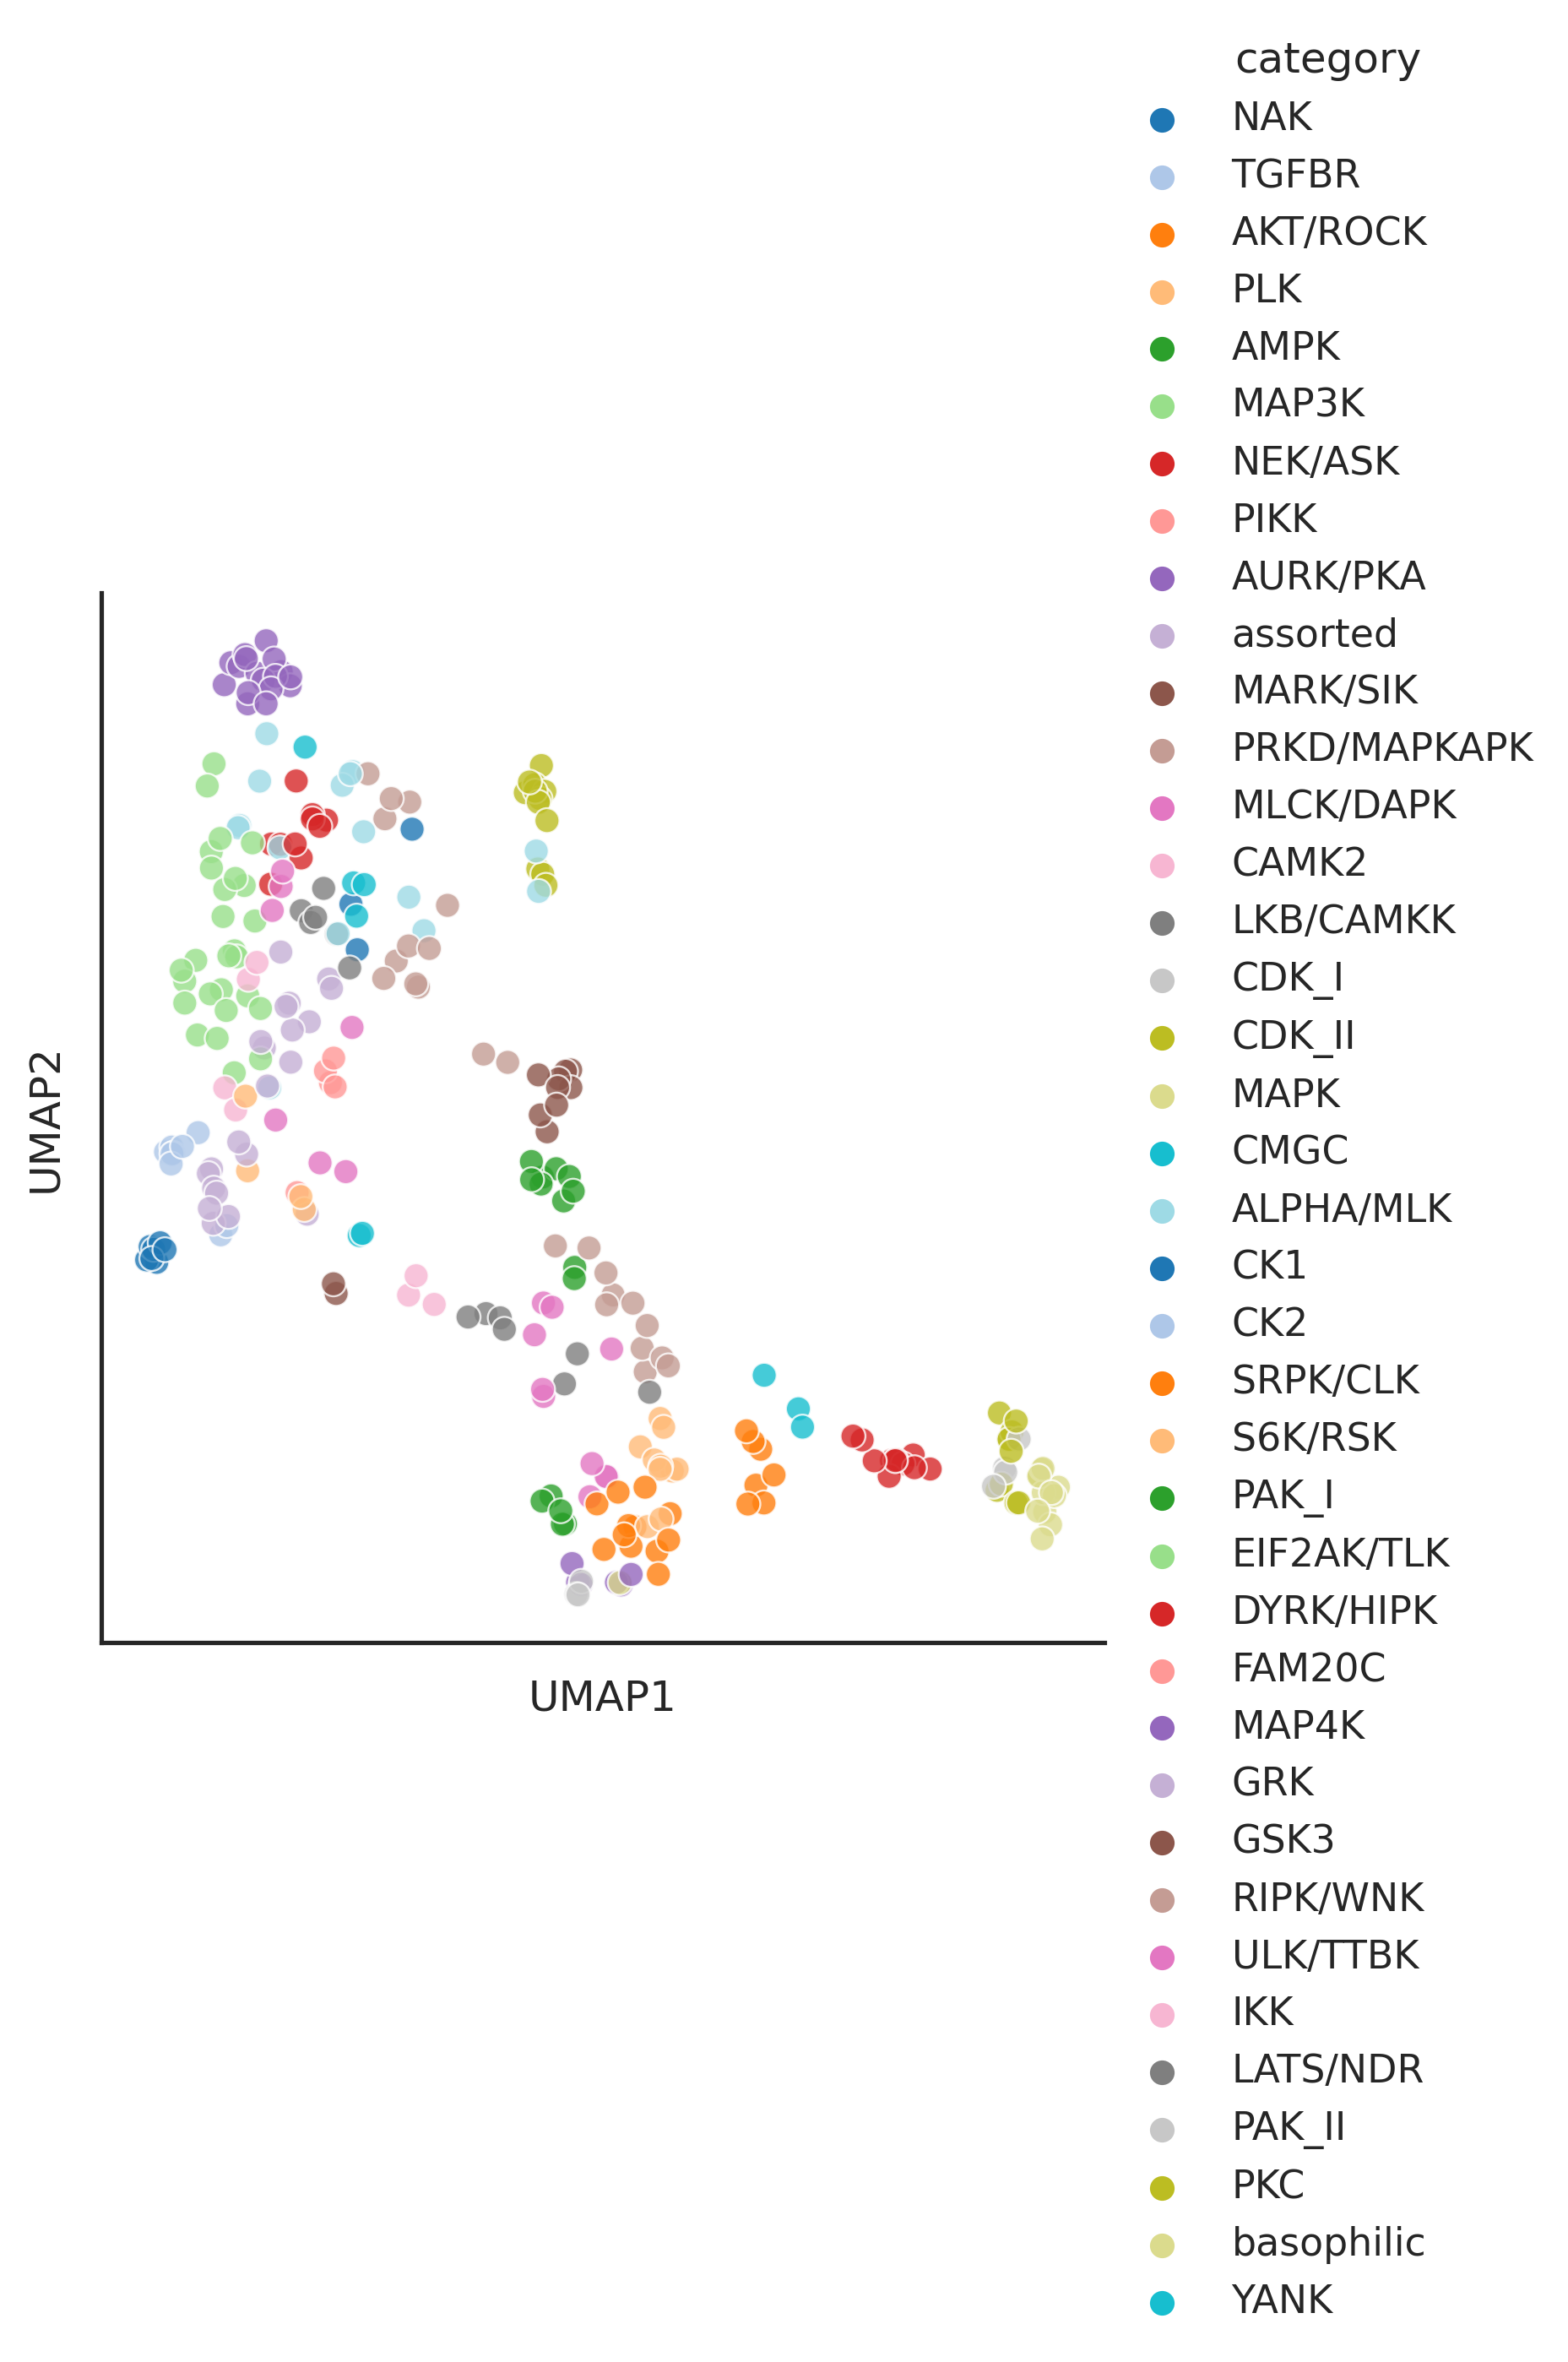

In [101]:
plot_cluster(df, hue = kinase_info.category, legend=True,method= 'umap')

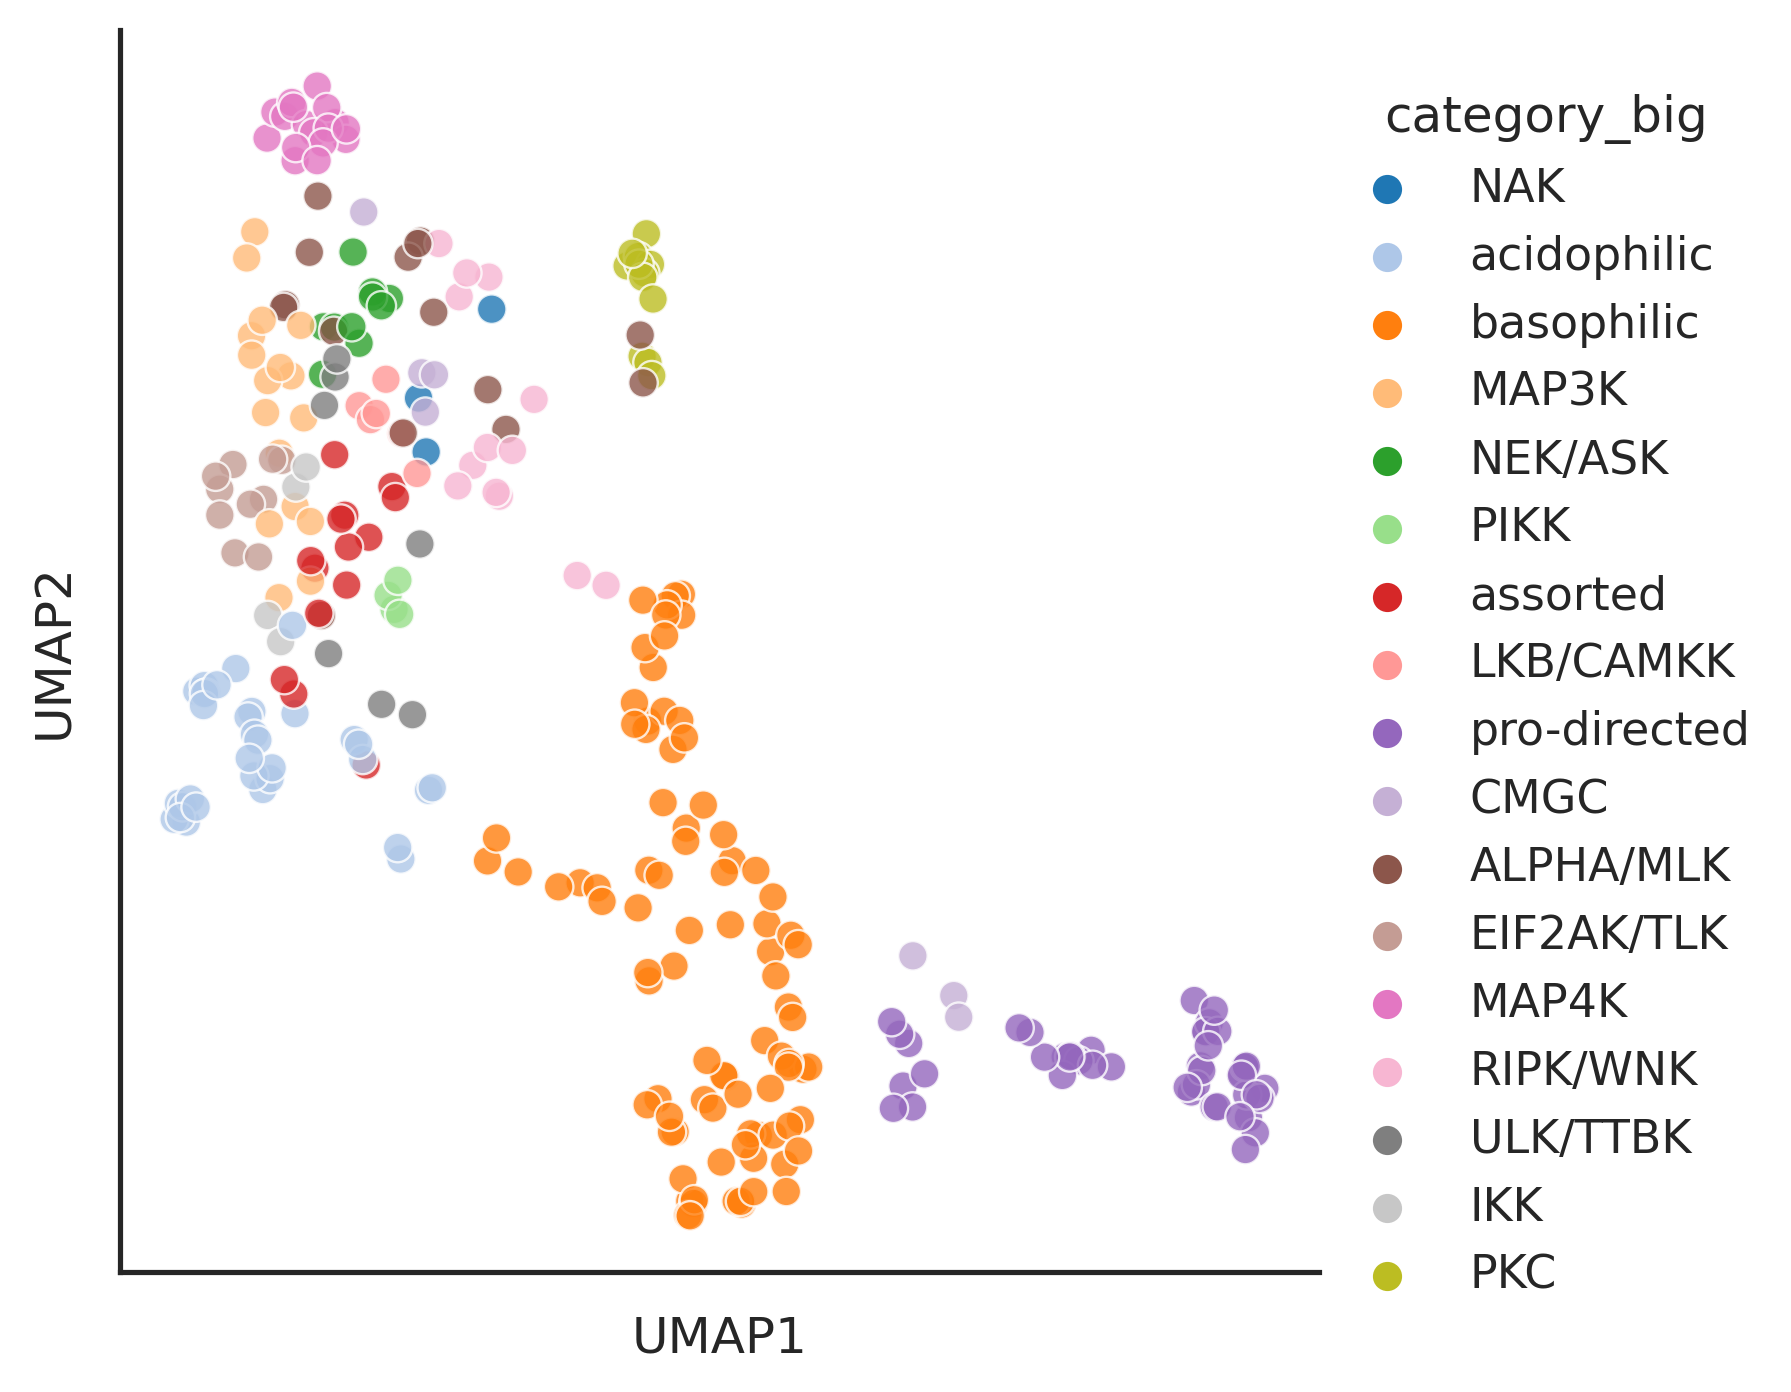

In [102]:
plot_cluster(df, hue = kinase_info.category_big, legend=True,method= 'umap')

### t = 0.5

In [103]:
info.Cluster_t05.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], dtype=int32)

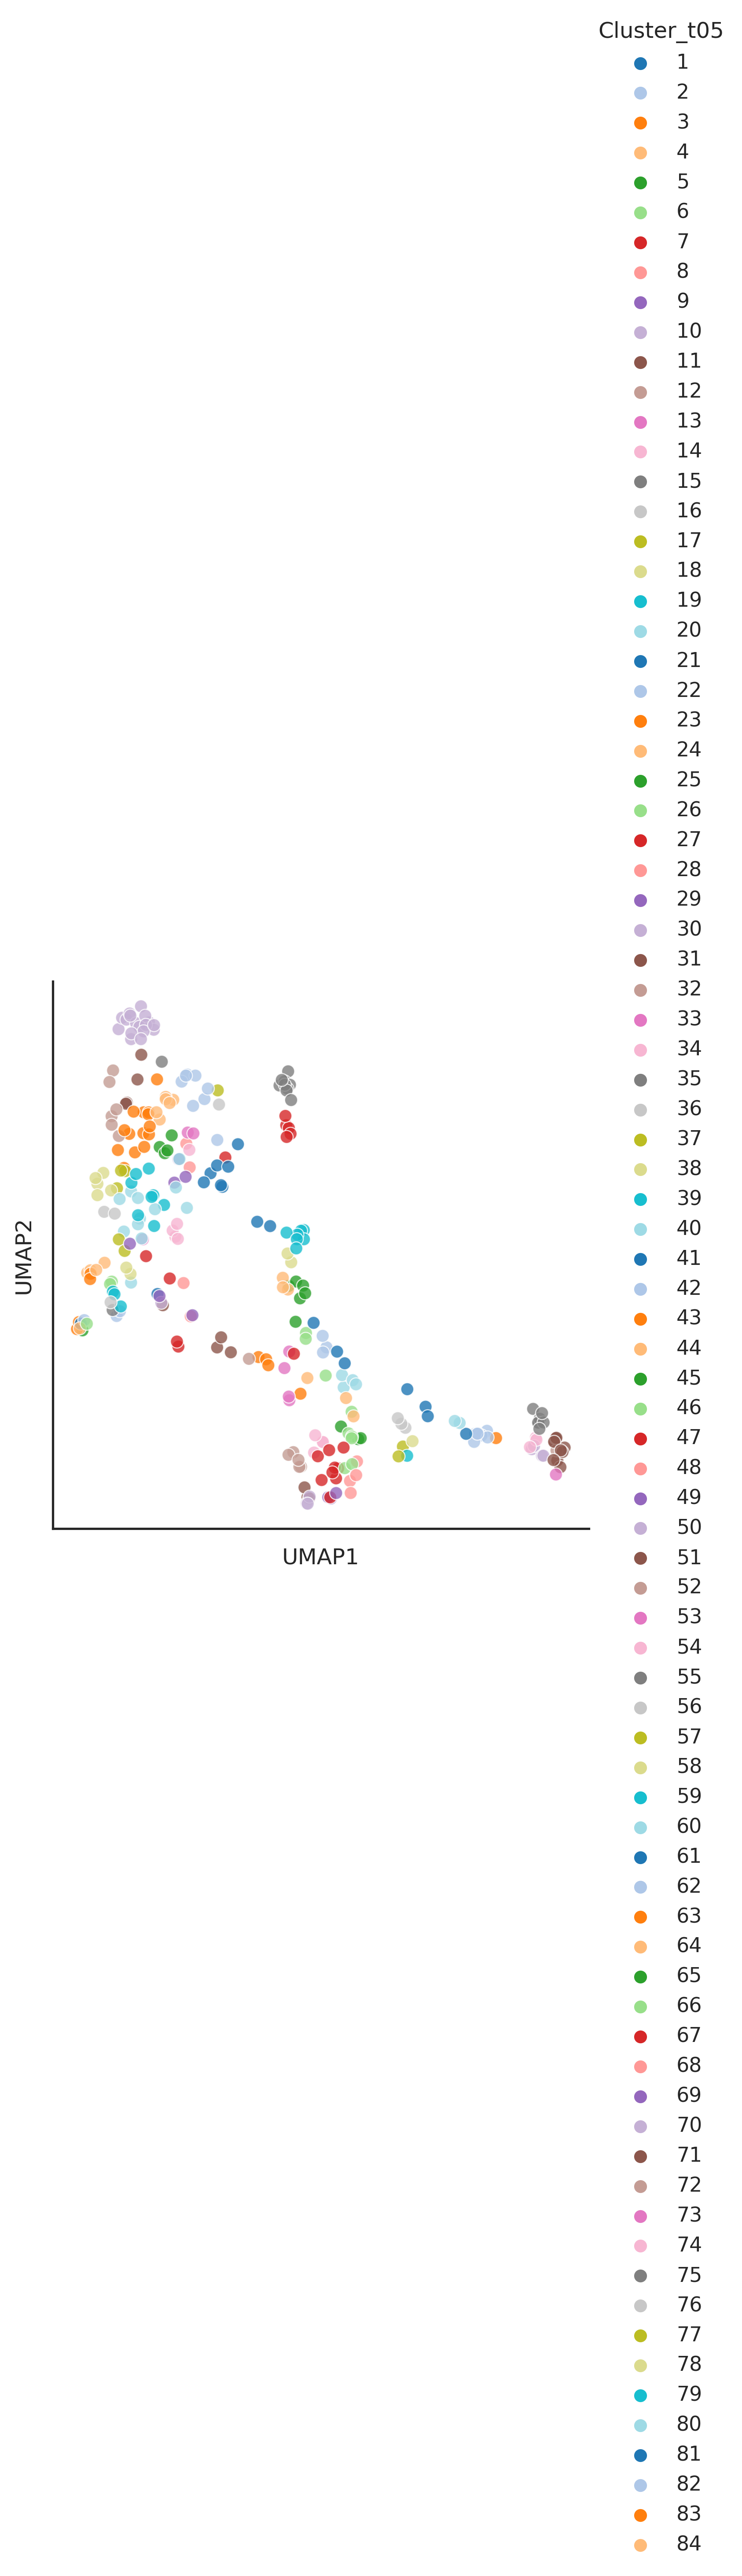

In [104]:
plot_cluster(df, hue = info.Cluster_t05, legend=True,method= 'umap',complexity=30)

### t=1

30 clusters

In [105]:
info.Cluster_t1.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int32)

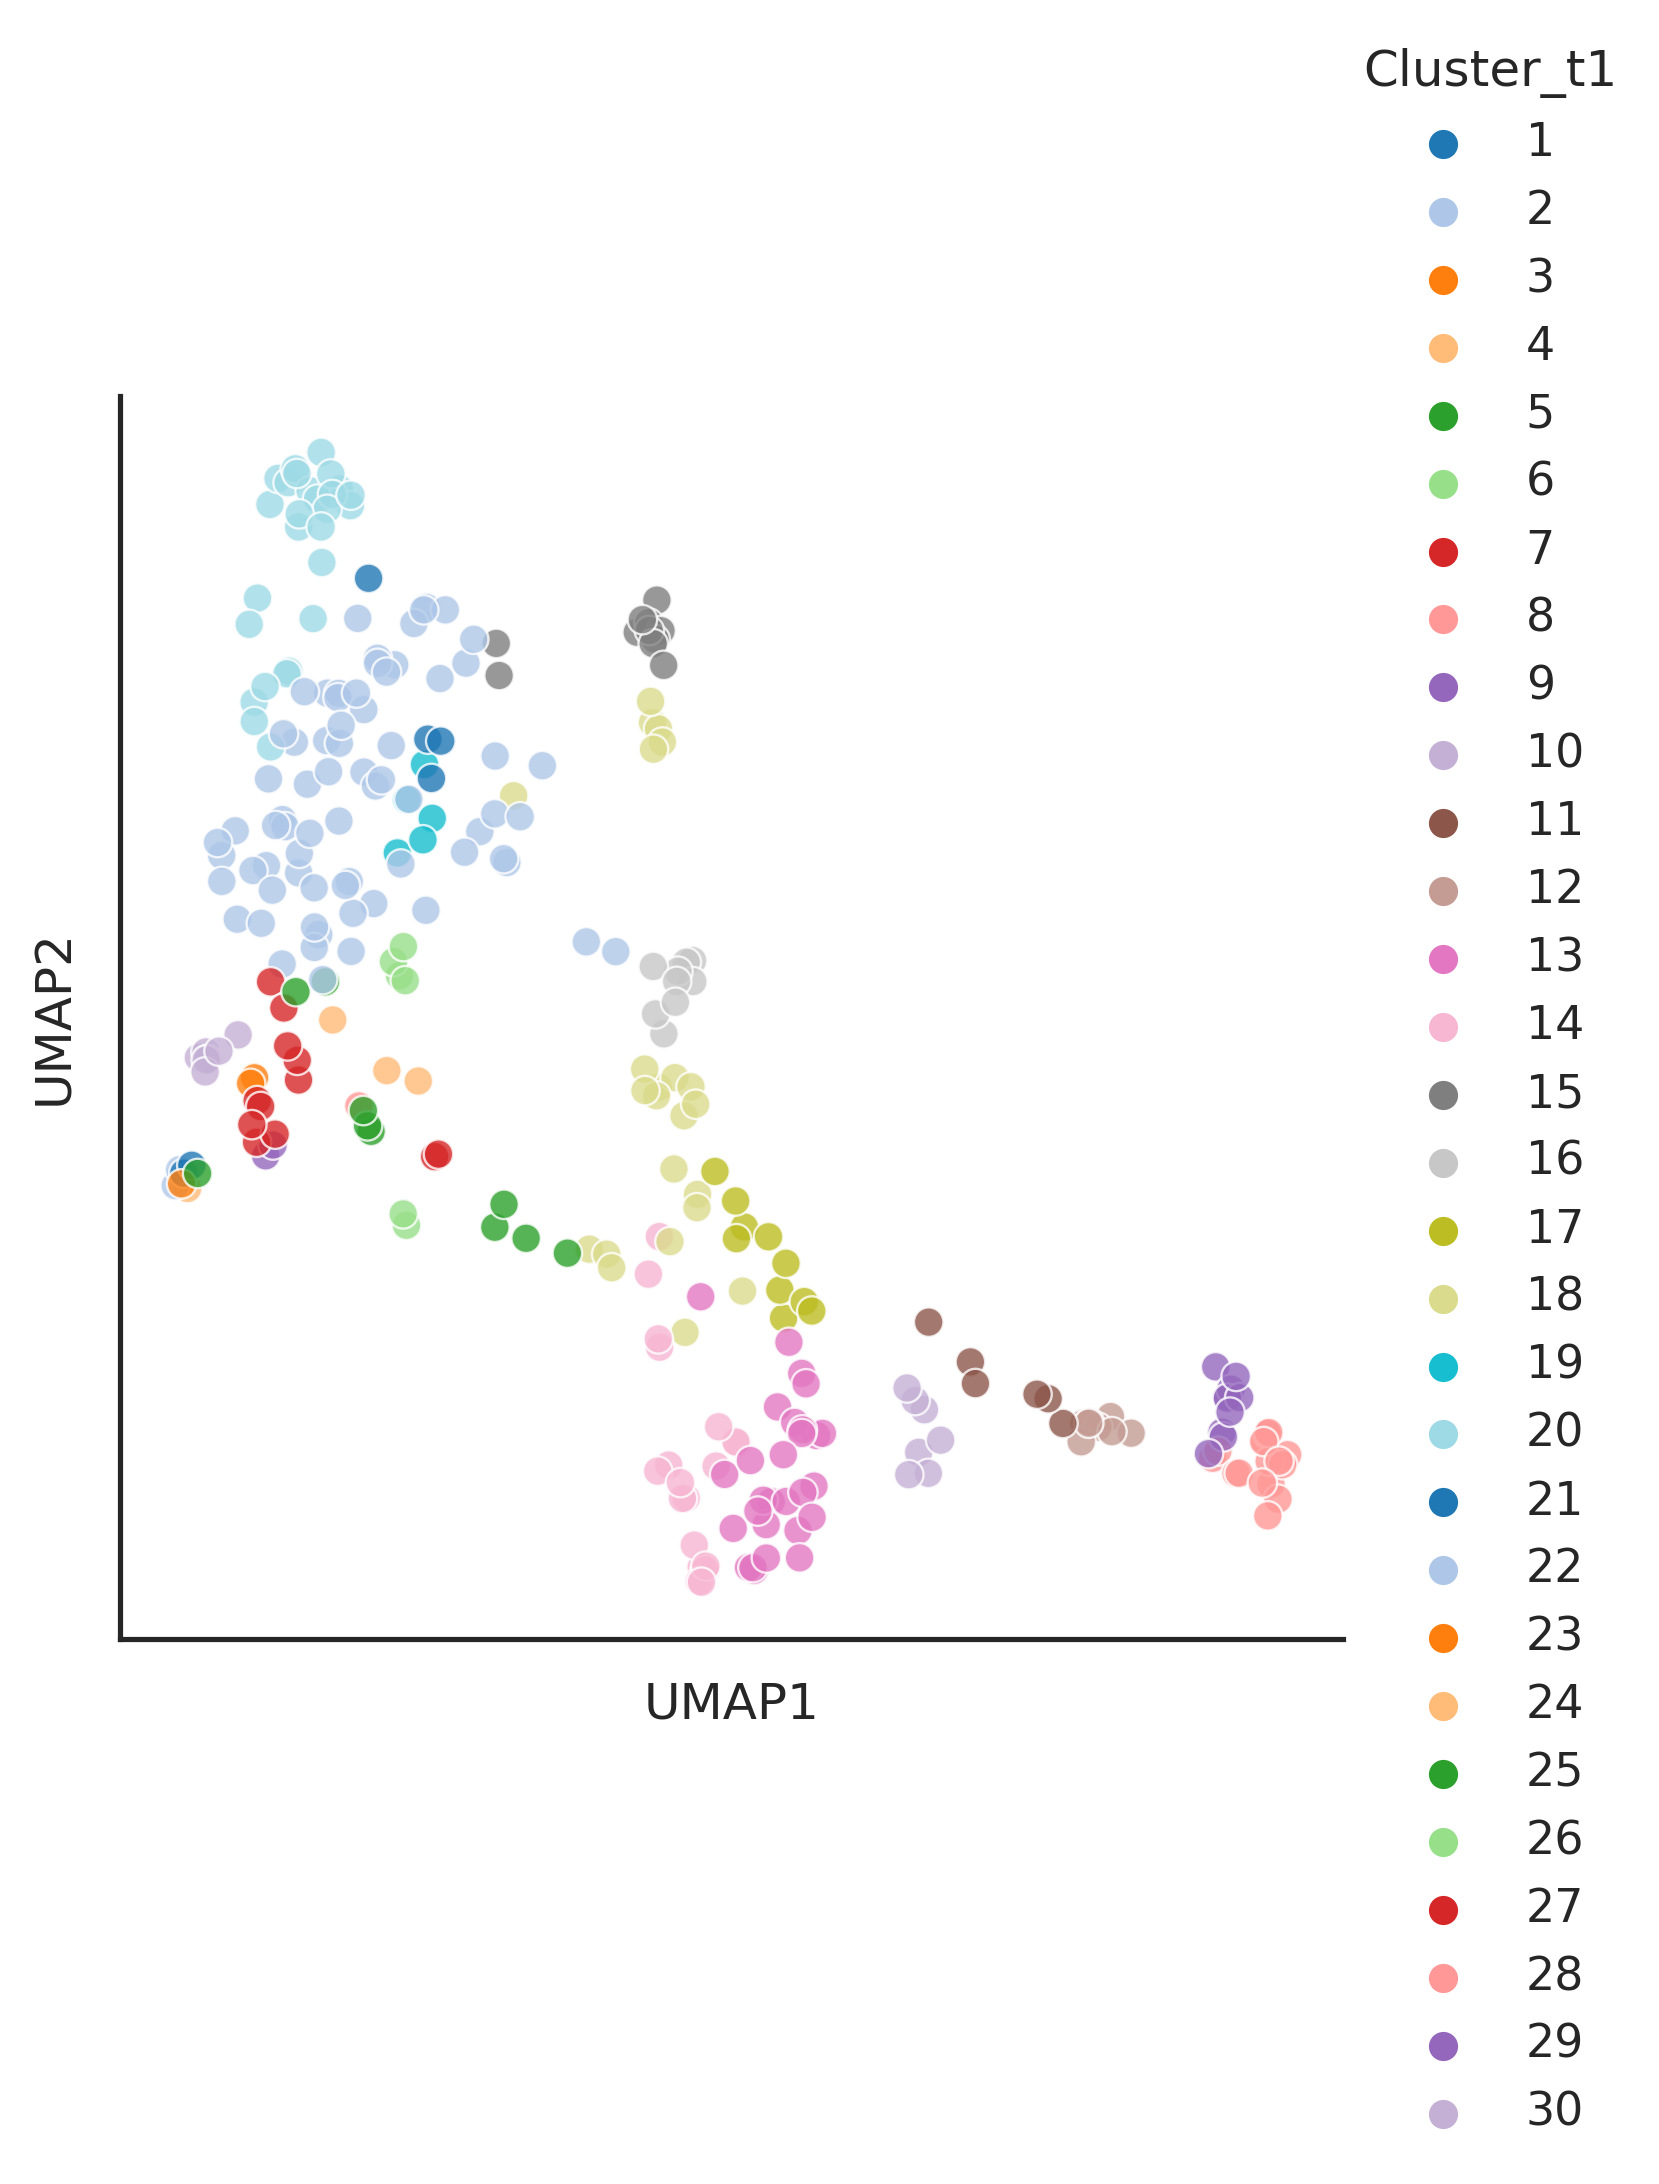

In [106]:
plot_cluster(df, hue = info.Cluster_t1, legend=True,method= 'umap',complexity=30)

### t=2

13 clusters

In [107]:
info.Cluster_t2.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int32)

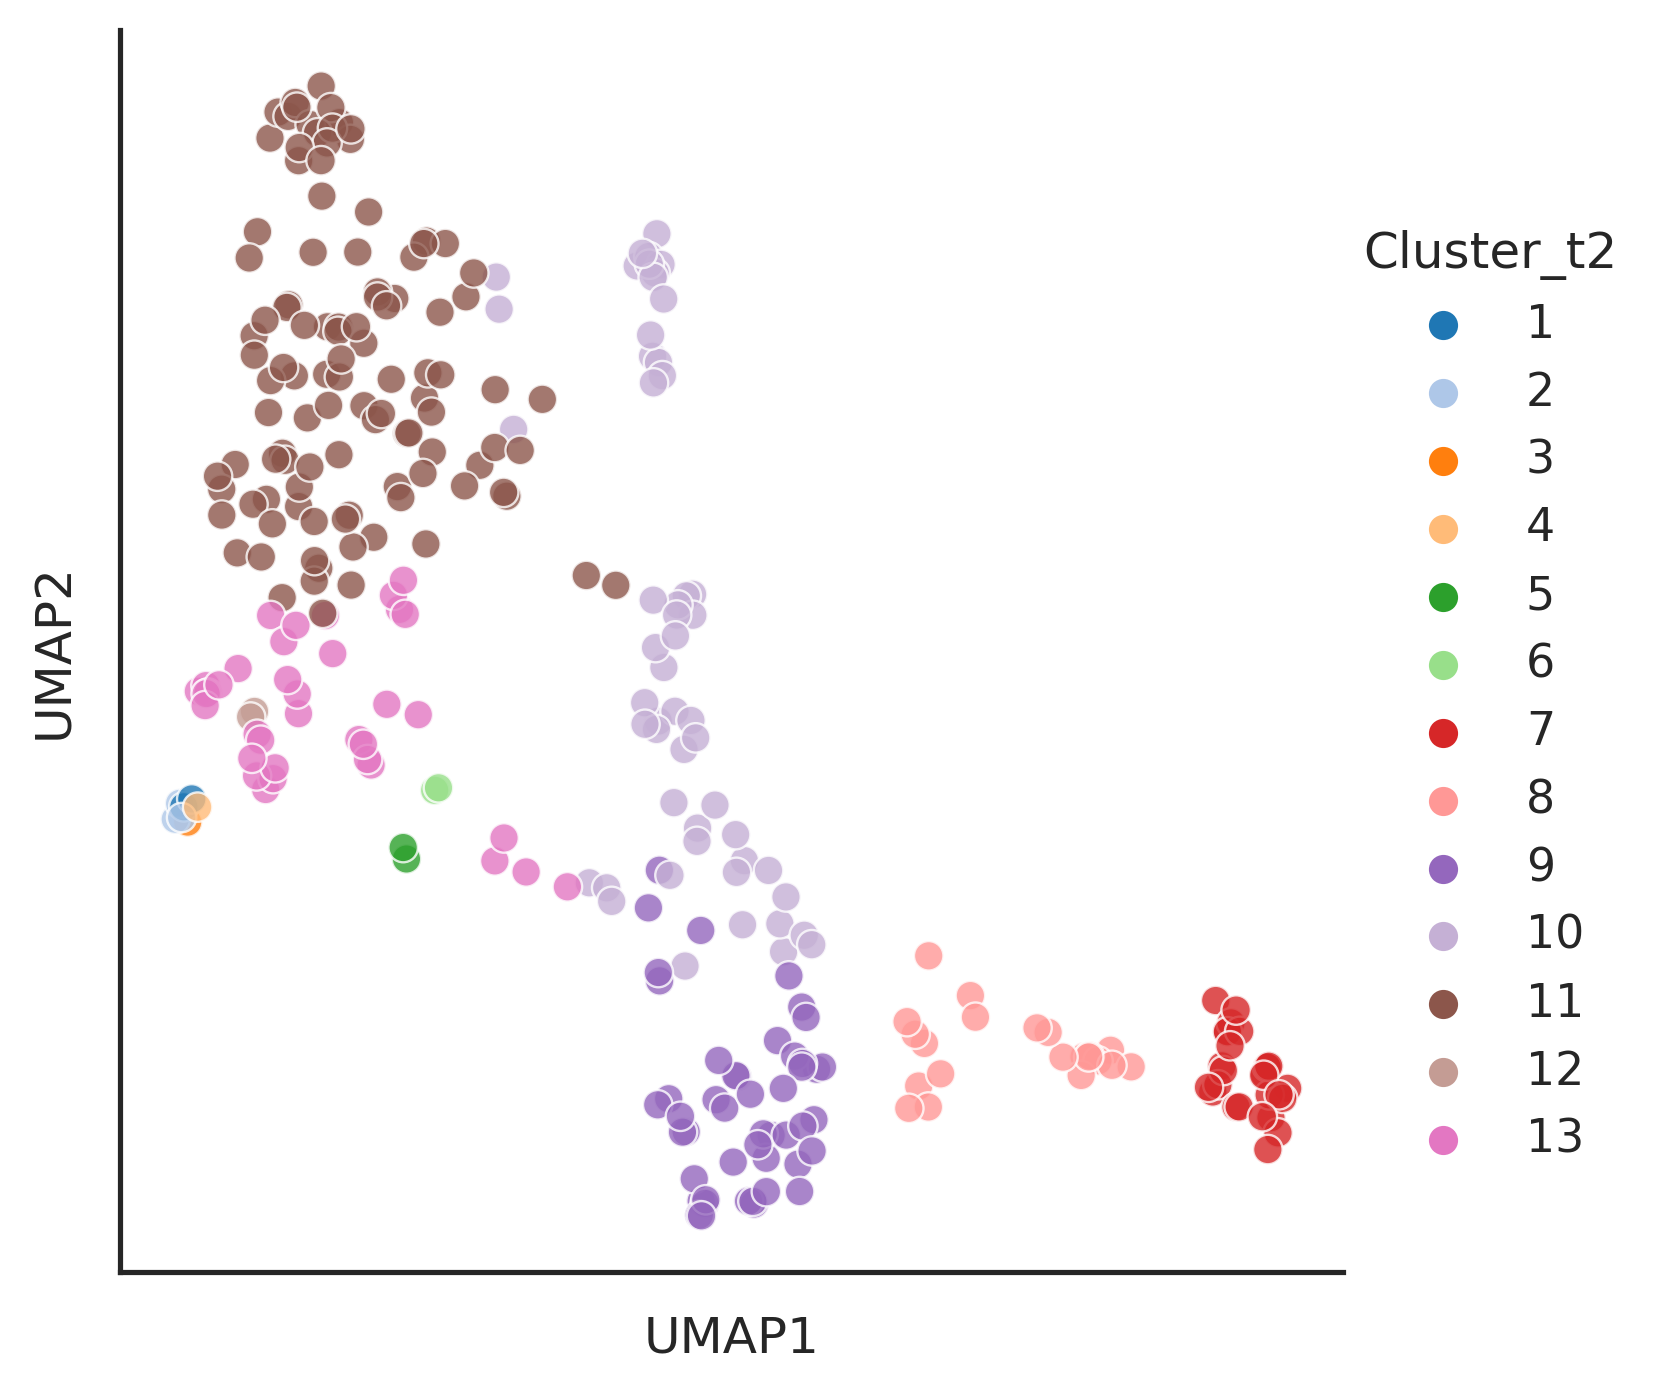

In [108]:
plot_cluster(df, hue = info.Cluster_t2, legend=True,method= 'umap',complexity=30)